In [341]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#Statistical Calculations
import scipy.stats as stats

#Synthetic Data
from imblearn.over_sampling import SMOTE

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

#Scoring metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

#Ignoring the warnings
import warnings
warnings.filterwarnings('ignore')



## Problem Statement
* This hackathon will try to address the challenges of banking telecallers when they call blindly to people in order to sell       term deposit plans. The aim of this hackathon is to find the most accurate prediction of whether a person to be called will     subscribe to the term deposit plan or not using any of the machine learning algorithms. The participants can use the             historical data that consists of different features of customers and whether they subscribed to the plan or not. Using this     data, the participants need to build a machine learning model in order to make predictions.

## Input Features
* Age: Age of the customer
* Job: Type of job of customer
* Marital: Marital status of the customer
* Education: The education level of the customer
* Default: Has credit in default?
* Balance: Average yearly balance (in Euros)
* Housing: Has a housing loan?
* Loan: Has a personal loan?
* Contact: Contact communication type
* Day: Last contact day of the month
* Month: Last contact month of the year
* Duration: Last contact duration, in seconds
* Campaign: Number of contacts performed during this campaign and for this client
* Pdays: Number of days that passed by after the client was last contacted from a previous campaign (-1 means the client was not previously contacted)
* Previous: Number of contacts performed before this campaign and for this client
* Poutcome: Outcome of the previous marketing campaign

In [342]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [343]:
#Shape 
df_train.shape, df_test.shape

((21000, 17), (9000, 16))

In [344]:
df_train.head()

age          job   marital  education default  balance housing loan  \
0   51       admin.   married   tertiary      no      148      no   no   
1   55  blue-collar   married  secondary      no     7160     yes   no   
2   65  blue-collar  divorced   tertiary      no     2197     yes   no   
3   25       admin.   married  secondary      no     6658     yes   no   
4   36     services   married  secondary      no     1761     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y_bool  
0  cellular   15   apr       263         2     -1         0  unknown       0  
1   unknown    4   may       315         1     -1         0  unknown       0  
2  cellular   12   may       102         2     -1         0  unknown       0  
3  cellular   16   feb       197         1     -1         0  unknown       1  
4  cellular   19   sep       177         1     -1         0  success       0

In [345]:
df_test.head()

age          job   marital  education default  balance housing loan  \
0   36   technician  divorced  secondary      no     1842     yes  yes   
1   26   management   married    primary      no      165      no   no   
2   50   management   married    unknown      no     5006     yes   no   
3   56   management   married  secondary      no     5122      no   no   
4   26  blue-collar   married   tertiary      no      151      no   no   

    contact  day month  duration  campaign  pdays  previous poutcome  
0  cellular    5   aug       149         1     -1         0  unknown  
1  cellular    7   nov        44         2     -1         0  unknown  
2  cellular    7   may       664         2     -1         0    other  
3  cellular    9   aug        53         2     -1         0  unknown  
4   unknown    1   jul        67         5    130         0  unknown

In [346]:
#Combining the train and the test
combined=pd.concat([df_train,df_test],ignore_index=False)

In [347]:
combined.head()

age          job   marital  education default  balance housing loan  \
0   51       admin.   married   tertiary      no      148      no   no   
1   55  blue-collar   married  secondary      no     7160     yes   no   
2   65  blue-collar  divorced   tertiary      no     2197     yes   no   
3   25       admin.   married  secondary      no     6658     yes   no   
4   36     services   married  secondary      no     1761     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  y_bool  
0  cellular   15   apr       263         2     -1         0  unknown     0.0  
1   unknown    4   may       315         1     -1         0  unknown     0.0  
2  cellular   12   may       102         2     -1         0  unknown     0.0  
3  cellular   16   feb       197         1     -1         0  unknown     1.0  
4  cellular   19   sep       177         1     -1         0  success     0.0

In [348]:
#Understanding the datatypes
combined.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y_bool       float64
dtype: object

In [349]:
#Checking for null values
combined.isnull().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
y_bool       9000
dtype: int64

* Observation :
    * The data does not have null values.
    * The y_bool null values are nothing but the outcome we seek to predict.

### Univariate Analysis

In [350]:
#Numerical Variables
num=combined[['age','duration','balance','campaign','pdays','previous']]

In [351]:
#Categorical Variables
cat=combined.select_dtypes(include='object')

In [352]:
cat

job   marital  education default housing loan   contact month  \
0          admin.   married   tertiary      no      no   no  cellular   apr   
1     blue-collar   married  secondary      no     yes   no   unknown   may   
2     blue-collar  divorced   tertiary      no     yes   no  cellular   may   
3          admin.   married  secondary      no     yes   no  cellular   feb   
4        services   married  secondary      no     yes   no  cellular   sep   
...           ...       ...        ...     ...     ...  ...       ...   ...   
8995  blue-collar    single   tertiary     yes      no   no  cellular   aug   
8996   technician  divorced    primary      no      no   no  cellular   nov   
8997  blue-collar    single   tertiary      no     yes  yes   unknown   apr   
8998       admin.   married  secondary      no      no   no   unknown   apr   
8999   technician   married   tertiary      no     yes   no  cellular   jul   

     poutcome  
0     unknown  
1     unknown  
2     unknown  
3     unknown  
4     success  
...       ...  
8995  unknown  
8996  unknown  
8997  unknown  
8998  unknown  
8999  unknown  

[30000 rows x 9 columns]

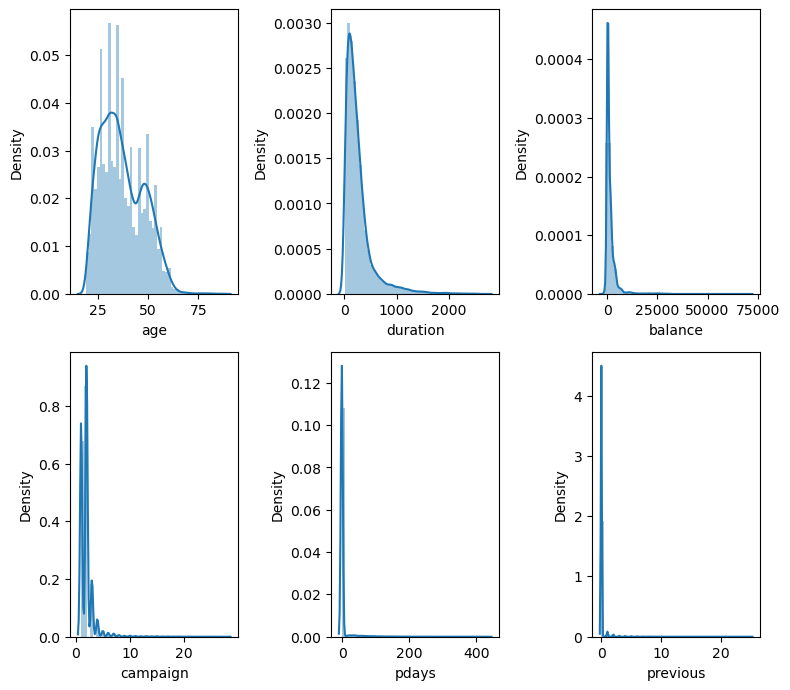

In [353]:
#Visualizing the distribution of numerical columns
plt.figure(figsize=(8,10))
t=1
for i in num:
    plt.subplot(3,3,t)
    sns.distplot(num[i])
    plt.tight_layout()
    t+=1
plt.show()

* Obervations :
    * Except age, the data seems to be skewed.

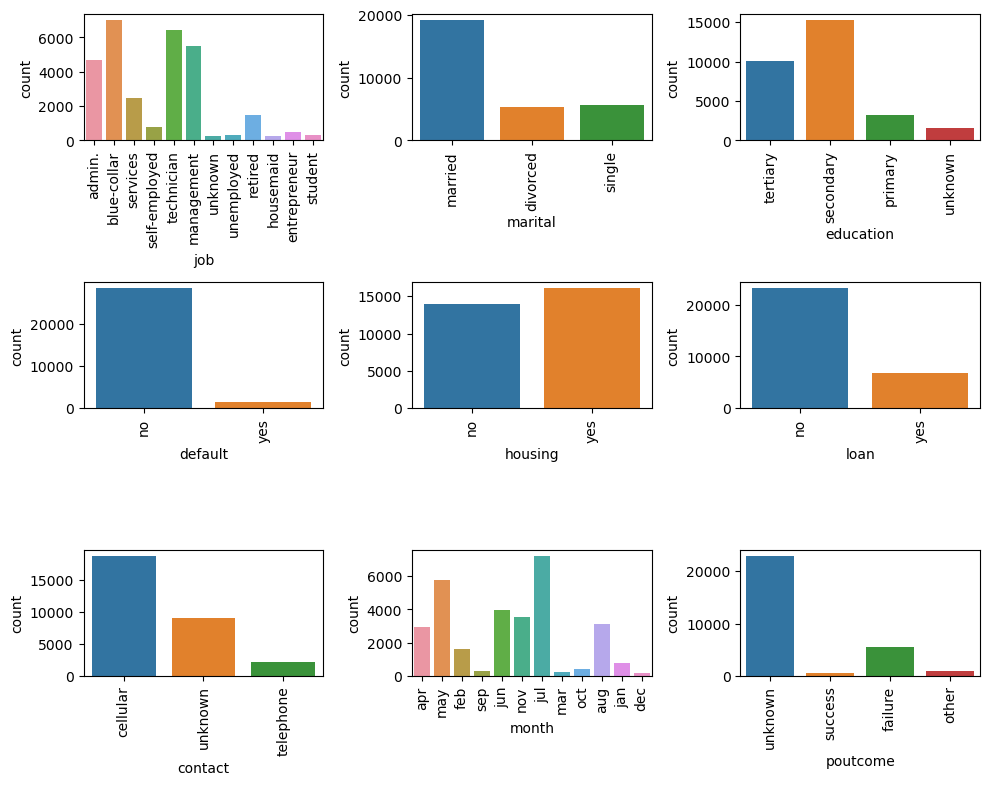

In [354]:
#Visualizing the frequency of numerical columns
plt.figure(figsize=(10,15))
t=1
for i in cat:
    plt.subplot(6,3,t)
    sns.countplot(x=cat[i])
    plt.tight_layout()
    plt.xticks(rotation=90)
    t+=1
plt.show()

<Axes: >

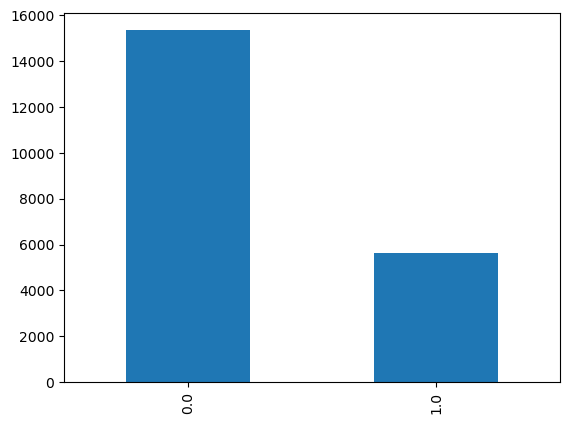

In [355]:
# Target variable
combined['y_bool'].value_counts().plot(kind='bar')

* Observations :
    * The job has highest frequency of blue-collar,technician and management.
    * Of the individuals contacted maximum number of individuals were married.
    * Most number of individuals had education upto secondary.
    * Higher number of individuals did not default on loans and did not have any personal loans.
    * Higher number of individuals had home loans.
    * Higher number of individuals were contacted through cellular means.
    * Highest number of contacts were made in the month of july.
    * Most number of outcome for calls were unknown.
    * The target variable is highly imbalanced with close to 1/3rd of the data representing the 0 class.

## Bivariate Analysis

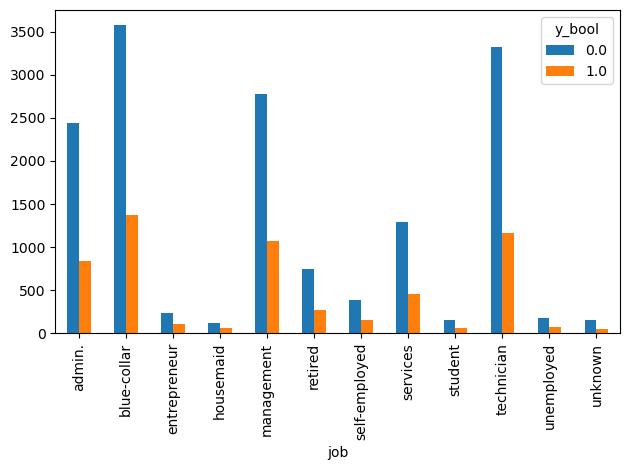

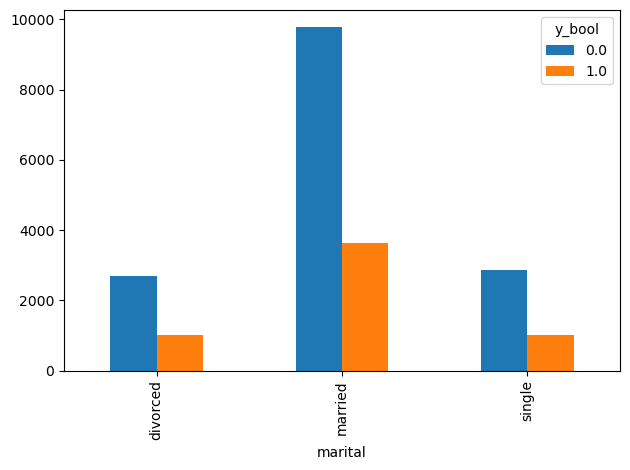

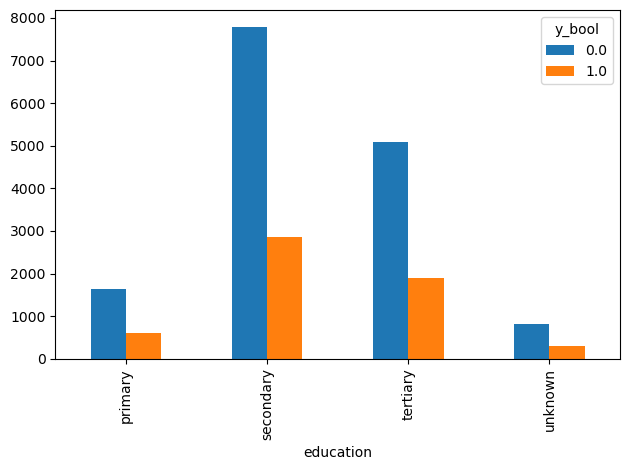

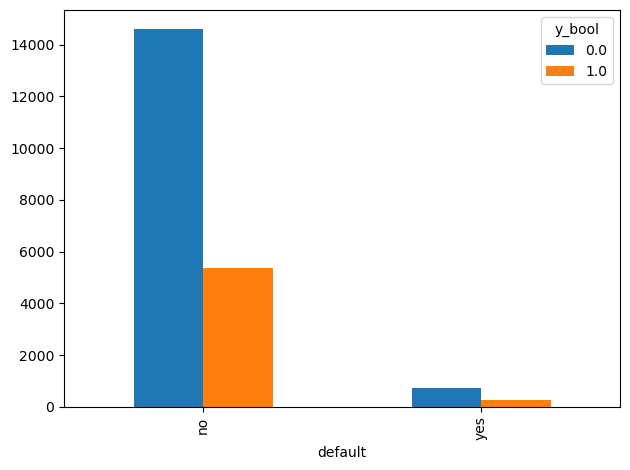

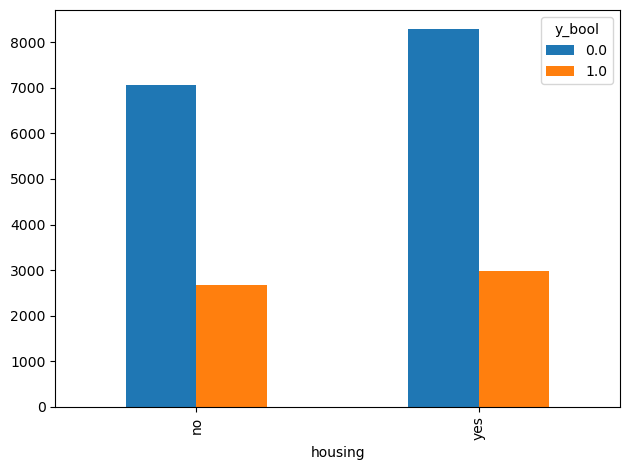

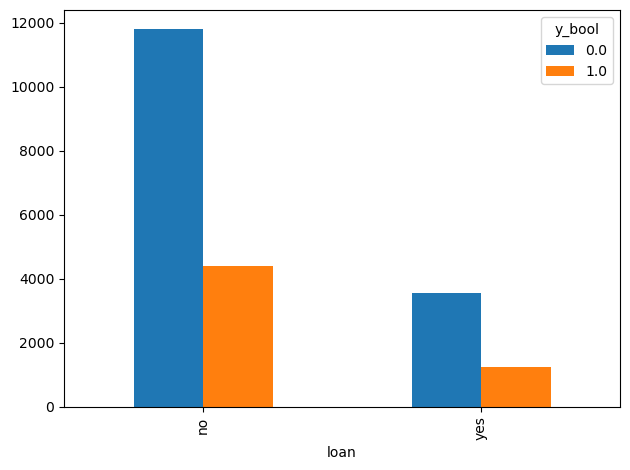

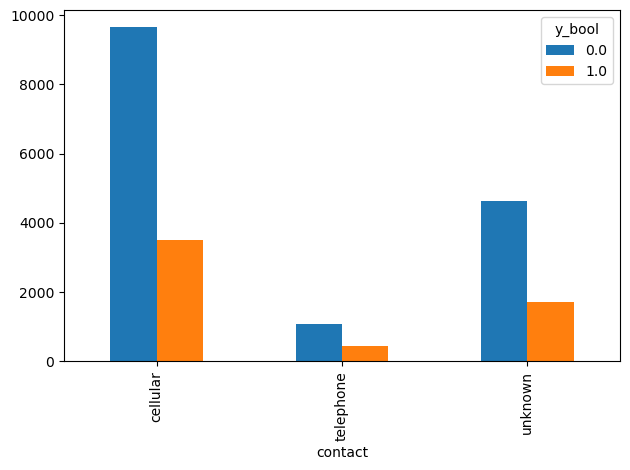

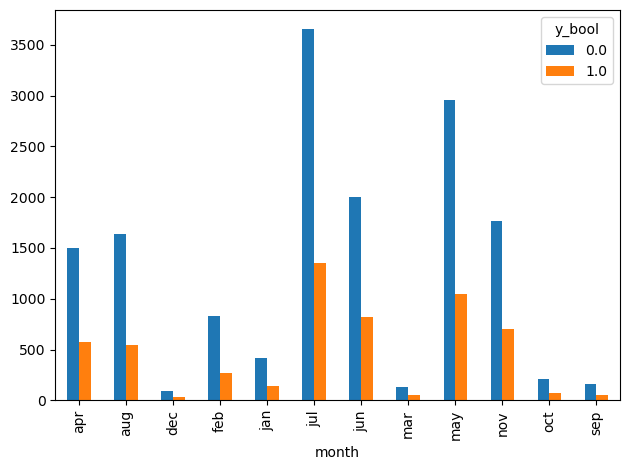

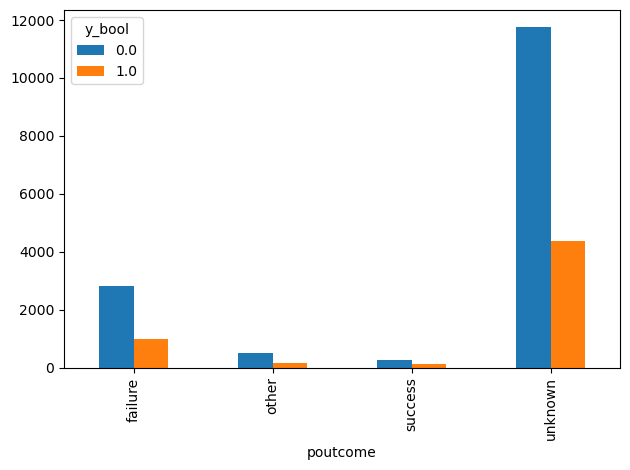

In [356]:

for i in cat:
    
    tbl=pd.crosstab(combined[i],combined['y_bool'])
    tbl.plot(kind='bar')
    plt.tight_layout()
    
plt.show()

### Feature Engineering

In [357]:
#Reducing the categories in job to 3.

l1=['housemaid','unknown','student','unemployed','retired']
l2=['self-employed','entrepreneur']


In [358]:
def category(i):
    if i in l1:
        return('not employed')
    elif i in l2:
        return('business')
    else:
        return(i)

In [359]:
combined['job']=combined['job'].apply(category)

In [360]:
# Day
combined["day"]=combined['day'].apply(lambda x: 'Fortnight' if x in np.arange(1,16) else 'Month_end')

In [361]:
combined.head()

age          job   marital  education default  balance housing loan  \
0   51       admin.   married   tertiary      no      148      no   no   
1   55  blue-collar   married  secondary      no     7160     yes   no   
2   65  blue-collar  divorced   tertiary      no     2197     yes   no   
3   25       admin.   married  secondary      no     6658     yes   no   
4   36     services   married  secondary      no     1761     yes   no   

    contact        day month  duration  campaign  pdays  previous poutcome  \
0  cellular  Fortnight   apr       263         2     -1         0  unknown   
1   unknown  Fortnight   may       315         1     -1         0  unknown   
2  cellular  Fortnight   may       102         2     -1         0  unknown   
3  cellular  Month_end   feb       197         1     -1         0  unknown   
4  cellular  Month_end   sep       177         1     -1         0  success   

   y_bool  
0     0.0  
1     0.0  
2     0.0  
3     1.0  
4     0.0

In [362]:
#Month wise duration
combined.groupby('month')['duration'].describe()

count        mean         std  min    25%    50%     75%     max
month                                                                   
apr    2943.0  261.099898  292.930732  4.0   91.0  183.0  307.00  2552.0
aug    3125.0  261.217600  283.786177  4.0   93.0  181.0  316.00  2426.0
dec     189.0  289.010582  359.221795  5.0   87.0  177.0  335.00  2349.0
feb    1590.0  264.844654  286.591467  4.0   91.0  188.0  321.75  2384.0
jan     766.0  252.765013  264.536763  5.0   91.0  184.0  307.00  2111.0
jul    7196.0  256.729850  276.385000  4.0   92.0  181.0  316.00  2552.0
jun    3946.0  266.576026  292.032160  4.0   96.0  185.0  320.00  2703.0
mar     251.0  250.956175  291.602198  6.0   90.5  173.0  322.50  2144.0
may    5727.0  267.959665  294.735389  4.0   94.0  185.0  325.00  2549.0
nov    3550.0  263.676338  273.949857  4.0   99.0  186.5  318.00  2434.0
oct     410.0  270.680488  310.693810  4.0   91.5  188.5  324.50  2160.0
sep     307.0  278.947883  302.548809  5.0  104.0  198.0  328.00  2327.0

In [363]:
combined['mean_dur']=combined.groupby('month')['duration'].transform('mean')
combined['std_dur']=combined.groupby('month')['duration'].transform('std')
combined['min_dur']=combined.groupby('month')['duration'].transform('min')
combined['max_dur']=combined.groupby('month')['duration'].transform('max')
combined['median_dur']=combined.groupby('month')['duration'].transform('median')


## Hypothesis testing
* Aim : Significance of the new features.

In [364]:
combined.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y_bool', 'mean_dur', 'std_dur', 'min_dur',
       'max_dur', 'median_dur'],
      dtype='object')

In [365]:
col_list=['mean_dur', 'std_dur', 'min_dur','max_dur', 'median_dur']

In [366]:
for i in col_list:
    tabl=pd.crosstab(combined[i],combined['y_bool'])
    p_value=stats.chi2_contingency(tabl)[1]
    if p_value > 0.05:
        print(i)

mean_dur
std_dur
min_dur
median_dur


In [367]:
#Months
combined['month']=combined['month'].apply(lambda x: 'Good response' if x in ['apr','may','jun','jul','aug','nov'] else 'Bad response')

In [368]:
combined['education'].unique()

array(['tertiary', 'secondary', 'primary', 'unknown'], dtype=object)

In [369]:
#Education
map_={'unknown': 0,'primary' : 1,'secondary' : 2,'tertiary' : 3}

In [370]:
combined['education']=combined['education'].map(map_)

In [371]:
#Balance
combined.groupby('month')['balance'].describe()

count         mean          std     min    25%    50%  \
month                                                                    
Bad response    3513.0  1718.509536  3203.691398 -2072.0  324.0  657.0   
Good response  26487.0  1593.358742  2960.101482 -2477.0  300.0  631.0   

                  75%      max  
month                           
Bad response   1983.0  30551.0  
Good response  1866.5  71188.0

In [372]:
combined['mean_bal']=combined.groupby('month')['balance'].transform('mean')
combined['std_bal']=combined.groupby('month')['balance'].transform('std')
combined['min_bal']=combined.groupby('month')['balance'].transform('min')
combined['max_bal']=combined.groupby('month')['balance'].transform('max')
combined['median_bal']=combined.groupby('month')['balance'].transform('median')


In [373]:
combined.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y_bool', 'mean_dur', 'std_dur', 'min_dur',
       'max_dur', 'median_dur', 'mean_bal', 'std_bal', 'min_bal', 'max_bal',
       'median_bal'],
      dtype='object')

In [374]:
combined.drop(['balance','duration','max_dur'],axis=1,inplace=True)

In [375]:
combined.shape

(30000, 24)

In [376]:
# Train- Test Split
train=combined.iloc[:df_train.shape[0],:]


In [377]:
test=combined.iloc[df_train.shape[0]:,:]

In [378]:
train.shape, test.shape

((21000, 24), (9000, 24))

## Encoding`

In [379]:
#Dummy encoding on the remaining categorical variables
dummytrain=pd.get_dummies(train,drop_first=True)
dummytest=pd.get_dummies(test,drop_first=True)

In [380]:
X=dummytrain.drop('y_bool',axis=1)
y = dummytrain['y_bool']

dummytest=dummytest.drop('y_bool',axis=1)

In [381]:
smote=SMOTE(sampling_strategy='minority')

In [382]:
X_s,y_s=smote.fit_resample(X,y)

## Model Building

In [383]:
#Creating an empty Dataframe to store the metrics from various models.
model_evaluation=pd.DataFrame(columns=['Model','Accuracy Score','Precision Score','Recall','F1 Score'])

In [384]:
#Defining a function to get the metrics
def perf_metric(test,pred):
    accuracy=accuracy_score(test,pred)
    precision=precision_score(test,pred)
    recall=recall_score(test,pred)
    f1score=f1_score(test,pred)
    return (accuracy,precision,recall,f1score)

In [385]:
#Defining a function to add the metrics into the dataframe
def update_results(name,test,pred):
    global perf_metric
    global model_evaluation
    model_evaluation=model_evaluation.append({'Model':name,
                               'Accuracy Score' : perf_metric(test,pred)[0],
                               'Precision Score' : perf_metric(test,pred)[1],
                                 'Recall' : perf_metric(test,pred)[2],
                                   'F1 Score' : perf_metric(test,pred)[3]},
                                            ignore_index=True)
        

In [386]:
#Logistic Regression
lr=LogisticRegression(random_state=10)

In [387]:
lr.fit(X,y)

LogisticRegression(random_state=10)

In [388]:
ypred_train=lr.predict(X)

In [389]:
update_results('Logistic_train',y,ypred_train)

In [390]:
#Decision Tree
dt=DecisionTreeClassifier()

In [391]:
dt.fit(X,y)

DecisionTreeClassifier()

In [392]:
ypred_train=dt.predict(X)

In [393]:
update_results('DT_train',y,ypred_train)

In [394]:
#Random Forest
rf=RandomForestClassifier()
rf.fit(X,y)
ypred_train=rf.predict(X)
update_results('Random Forest_train',y,ypred_train)

In [395]:
#AdaBoost
ada=AdaBoostClassifier()
ada.fit(X,y)
ypred_train=ada.predict(X)
update_results('ADAboost_train',y,ypred_train)


In [396]:
#GradientBoost
gb=GradientBoostingClassifier()
gb.fit(X,y)
ypred_train=gb.predict(X)
update_results('GradientBoost_train',y,ypred_train)


In [397]:
#XGBoost
xgb=XGBClassifier()
xgb.fit(X,y)
ypred_train=xgb.predict(X)
update_results('XGBoost_train',y,ypred_train)


In [398]:
model_evaluation

Model  Accuracy Score  Precision Score    Recall  F1 Score
0       Logistic_train        0.730905         0.000000  0.000000  0.000000
1             DT_train        0.991190         0.999269  0.967970  0.983371
2  Random Forest_train        0.991190         0.989785  0.977349  0.983528
3       ADAboost_train        0.730905         0.500000  0.004424  0.008770
4  GradientBoost_train        0.732619         1.000000  0.006371  0.012660
5        XGBoost_train        0.761095         0.952857  0.118032  0.210046

In [399]:
#stacking
estimators = [('dt',DecisionTreeClassifier()),('gb',GradientBoostingClassifier()),('xgb',XGBClassifier())]
stack=StackingClassifier(estimators=estimators,final_estimator=lr)

In [400]:
stack.fit(X,y)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('gb', GradientBoostingClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_pol...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression(random_state=10))

In [401]:
ypred_train=stack.predict(X)
update_results('Stacking',y,ypred_train)

In [402]:
model_evaluation

Model  Accuracy Score  Precision Score    Recall  F1 Score
0       Logistic_train        0.730905         0.000000  0.000000  0.000000
1             DT_train        0.991190         0.999269  0.967970  0.983371
2  Random Forest_train        0.991190         0.989785  0.977349  0.983528
3       ADAboost_train        0.730905         0.500000  0.004424  0.008770
4  GradientBoost_train        0.732619         1.000000  0.006371  0.012660
5        XGBoost_train        0.761095         0.952857  0.118032  0.210046
6             Stacking        0.731143         1.000000  0.000885  0.001768

In [403]:
ypred_test=stack.predict(dummytest)

In [404]:
sub=pd.DataFrame(ypred_test)

In [405]:
ypred_test=gb.predict(dummytest)

In [406]:
sub['gbr']=ypred_test

In [407]:
sub.to_excel('subm.xlsx',index=False)